# Logistic Regression: Classification

<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/ANN_LogisticRegression.jpg",  width="1000">
</div>

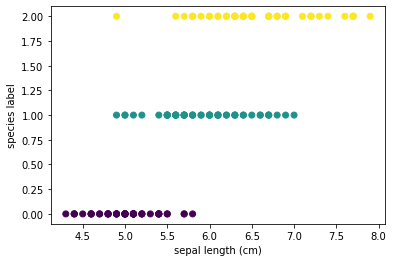

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf

iris = datasets.load_iris() 
X = iris.data      # 4 features per sample
y = iris.target    # species label

plt.scatter(X[:,0], y, c=y)
plt.xlabel(iris.feature_names[0])
plt.ylabel('species label')
plt.show()

Now aim to predict a specific flower species (label y) from length measurements (data X)

We can use the previous workflow for linear regression with only minor changes -- to turn it into a classification tool.

1. allow for multidimensional features as input (e.g. all 4 length measurements)
2. make probabilistic predictions y in [0,1]
3. adjust the cost function


## Define the Data

In [20]:
# define data
X = iris.data         # What is the shape of X? How many samples?
y = (iris.target==0)  # What is iris.target? What is this equation ?
y = y.astype(int)     # binarize y for class of choice # turn true/false into 1/0
nc = 1                # number of classes

input_shape = (1,)    # shape of X - without samples
if (X.ndim > 1):
  input_shape = X.shape[1:]

print(iris.target)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


## Define the Model

In [21]:
# check shapes frequently!
print('input_shape: ', input_shape)
print('X.shape:     ', X.shape)
print('y.shape:     ', y.shape)
print('classes:     ', nc)

model = tf.keras.Sequential(name='my_log_model')
model.add( tf.keras.layers.Dense(nc, input_shape = input_shape,
                                 activation = 'sigmoid',
                                 name='1st_layer'))

# define optimizer and loss
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

# see and understand the number of parameters
model.summary()  

input_shape:  (4,)
X.shape:      (150, 4)
y.shape:      (150,)
classes:      1
Model: "my_log_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1st_layer (Dense)            (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


Some definitions
- known labels: $y_i \in \{0,1\}$
- predicted labels:  $\hat y_i \in [0,1]$
- accuracy: fraction of true assignments
- cross-entropy (per sample $i$)
$$y_i \log(\hat y_i) + (1 - y_i) \log(1-\hat y_i) \longrightarrow $$
Average the above over all samples  $i$ 

. 

## Inspecting the fit

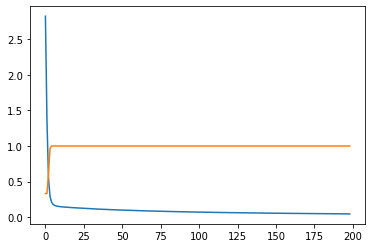

In [22]:
fh = model.fit(X, y, epochs=200, verbose=0)
plt.plot(fh.history['loss'][1:])
plt.plot(fh.history['binary_accuracy'][1:])
plt.show()

**Notice**: If you run the above code cell repeatedly (without redefining the model), the fit the loss will continue to decrease.

### Task (20 min): Evaluations, Predictions and Confusion

Understand the values and the shape of the predictions. 
Compare them to the observed label (use confusion matrix)

In [28]:
eval = model.evaluate(x=X, y=y)
print('[loss, accuracy] = ', eval)

x_predict = np.array([[16.0, 14.0, 5.1, 2.2],
                      [-5,-3,-1.5,-0.5]])

#yp = model.predict(x=x_predict)
yp = model.predict(x=X)
#print(f'yp{yp}')

# Inspect and understand the values in yp and compare them to y
print('y.shape:  ', y.shape)
print('yp.shape: ', yp.shape)
print('y[45:55]: ',  y[45:55])
print('yp[45:55]: ', yp[45:55])


5/5 [==============================] - 0s 6ms/step - loss: 0.0467 - binary_accuracy: 1.0000
[loss, accuracy] =  [0.04670817032456398, 1.0]
y.shape:   (150,)
yp.shape:  (150, 1)
y[45:55]:  [1 1 1 1 1 0 0 0 0 0]
yp[45:55]:  [[0.89293456]
 [0.9468314 ]
 [0.91685474]
 [0.9516227 ]
 [0.9325575 ]
 [0.04906905]
 [0.04534587]
 [0.02912268]
 [0.03731605]
 [0.02840433]]


Run the code below and inspect the confusion matrix

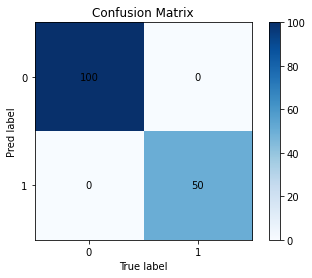

In [27]:
from sklearn.metrics import confusion_matrix
# my plot function for cm
def plot_cm(mat):
  classes = np.arange(cm.shape[0])
  plt.imshow(mat, cmap=plt.cm.Blues)
  for (j,i),label in np.ndenumerate(mat):
    plt.text(i,j,np.round(label,2),ha='center',va='center')

  plt.colorbar()
  plt.title('Confusion Matrix')
  plt.xlabel('True label')
  plt.ylabel('Pred label')
  plt.xticks(classes)
  plt.yticks(classes)
  plt.show()


cm = confusion_matrix(yp>=0.5, y)
plot_cm(cm)

## Group Task (30 min): Repeat

Change the code above to fit a model and predict another species. Track the fit performance (model loss) and report the final confusion analysis.

What could you do to improve performance?

Model: "my_log_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1st_layer (Dense)            (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


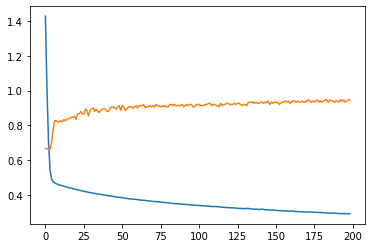

5/5 [==============================] - 1s 15ms/step - loss: 0.2909 - binary_accuracy: 0.9467
[loss, accuracy] =  [0.29086461663246155, 0.9466666579246521]


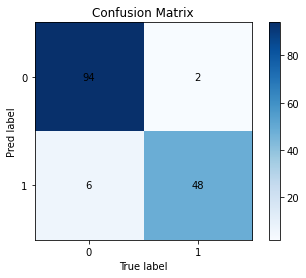

In [35]:
y_2 = (iris.target==2)  # What is iris.target? What is this equation ?
y_2 = y_2.astype(int)     # binarize y for class of choice # turn true/false into 1/0


model_2 = tf.keras.Sequential(name='my_log_model')
model_2.add( tf.keras.layers.Dense(nc, input_shape = input_shape,
                                 activation = 'sigmoid',
                                 name='1st_layer'))

# define optimizer and loss
model_2.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

# see and understand the number of parameters
model_2.summary()

fh_2 = model_2.fit(X, y_2, epochs=200, verbose=0)
plt.plot(fh_2.history['loss'][1:])
plt.plot(fh_2.history['binary_accuracy'][1:])
plt.show()

eval = model_2.evaluate(x=X, y=y_2)
print('[loss, accuracy] = ', eval)

x_predict = np.array([[16.0, 14.0, 5.1, 2.2],
                      [-5,-3,-1.5,-0.5]])

#yp = model.predict(x=x_predict)
yp_2 = model_2.predict(x=X)
#print(yp_2)

cm = confusion_matrix(yp_2>=0.5, y_2)
plot_cm(cm)

# Predicting Multiple Classes

<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/ANN_Softmax.jpg",  width="1000">
</div>

Notes: y1 and y2 are between 1 and 0 (from sigmoid function I think),
       and then this gets normalized so that they all add up to one

### Data

In [37]:
# define data
X  = iris.data    # What is the shape of X? How many samples?
y  = iris.target  # What is iris.target? What is this equation ?
nc = 3            # number of classes

input_shape = (1,)    # shape of X - without samples
if (X.ndim > 1):
  input_shape = X.shape[1:]

## Preliminaries

The following will be almost identical to logistic regression (predicting one class label) with only small changes

### Softmax:  $z \to \hat y$

The softmax operation transforms a score vector (z) into a vector of probabilities ($\hat y$):

$$\hat y_l = \frac{\exp(z_l)}{\sum_k \exp(z_k)}$$

Elements of $z$ are real number (with any sign), but this definition ensures that $\hat y_l \ge 0$ and $\sum_l \hat y_l = 1$

### Cross-Entropy Loss

For a given sample, we have the known annotations $y$ and the probabilistic predictions ($\hat y)$ from the model.

For $k$ categories both vectors a $k$-dimensional.
You may think of the true label $y$ as "one-hot encoded" For example:

$$y = (0,0,1,0,0,0)$$

Where the $1$ denotes the true class label: the third out of six in this example.

The loss for a given sample is defined as

$$l(y, \hat y)= - \sum_l^k y_l \log \hat y_l$$

Notice that this sum is non-zero only for a single term from the correct class (where $y_l=1$). Moreover, if the model prediction $\hat y_l$ was certain for that class and that specific sample, then $l((y, \hat y) = -\log(\hat y_l) = 0$. In general the loss will be larger than 0.

The total loss will be the average over all samples losses.

## Model

In [38]:
print('input_shape: ', input_shape)
print('X.shape:     ', X.shape)
print('y.shape:     ', y.shape)
print('classes:     ', nc)

# keras has many predefined loss functions and metrics
loss_name='sparse_categorical_crossentropy'   # for integer labels
acc='sparse_categorical_accuracy'             # additional metrics to track

model = tf.keras.Sequential(name='my_softmax_model')
model.add( tf.keras.layers.Dense(nc, input_shape = input_shape,
                                 activation = 'softmax',
                                 name='1st_layer'))


# define optimizer and loss
model.compile(optimizer='sgd', loss=loss_name, metrics=[acc])

 

input_shape:  (4,)
X.shape:      (150, 4)
y.shape:      (150,)
classes:      3


## Group task (30 min): Fit and Evaluate the model

- Summarize the model and understand the number of parameters
- Inspect the fit history and evaluate the model: has it converged?
- run a prediction: yp = model.predict(X). Understand the output.
- How would you predict the label based on yp
- Look at the corresponding confusion matrix

Model: "my_softmax_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1st_layer (Dense)            (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


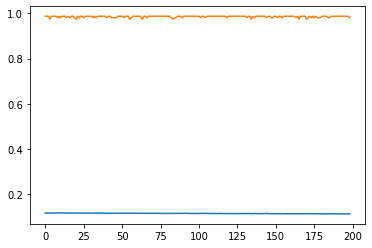

5/5 [==============================] - 0s 11ms/step - loss: 0.1138 - sparse_categorical_accuracy: 0.9867
[loss, accuracy] =  [0.11381892114877701, 0.9866666793823242]
species 1 species 2 species 3
[[9.93418872e-01 6.58107968e-03 8.55872151e-10]
 [9.74344254e-01 2.56557055e-02 1.38366039e-08]
 [9.89093542e-01 1.09064672e-02 4.79794604e-09]
 [9.77130651e-01 2.28693970e-02 3.07310160e-08]
 [9.95175123e-01 4.82485862e-03 6.71877998e-10]
 [9.94751394e-01 5.24864998e-03 9.38862432e-10]
 [9.91908967e-01 8.09096266e-03 6.61159572e-09]
 [9.89125609e-01 1.08744269e-02 3.07329828e-09]
 [9.70111251e-01 2.98887100e-02 6.82980570e-08]
 [9.76529598e-01 2.34703962e-02 9.98456162e-09]
 [9.94862258e-01 5.13772992e-03 3.05382719e-10]
 [9.86823440e-01 1.31766237e-02 8.66528982e-09]
 [9.76196945e-01 2.38030199e-02 1.11377627e-08]
 [9.89862442e-01 1.01376073e-02 6.02281114e-09]
 [9.98841941e-01 1.15814537e-03 5.21338138e-12]
 [9.99167919e-01 8.32073856e-04 1.41186958e-11]
 [9.98032033e-01 1.96796097e-03 9.0

In [55]:
#%%script echo edit before execution

# see and understand the number of parameters
model.summary()

fh = model.fit(X, y, epochs=200, verbose=0)

#print(fh.history)
plt.plot(fh.history['loss'][1:])
plt.plot(fh.history['sparse_categorical_accuracy'][1:])
plt.show()

eval = model.evaluate(x=X, y=y)
print('[loss, accuracy] = ', eval)

x_predict = np.array([[16.0, 14.0, 5.1, 2.2],
                      [-5,-3,-1.5,-0.5]])

#yp = model.predict(x=x_predict)
yp = model.predict(x=X)
yp1 = yp[:,0]
yp2 = yp[:,1]
yp3 = yp[:,2]

print('species 1', 'species 2', 'species 3')
print(yp)


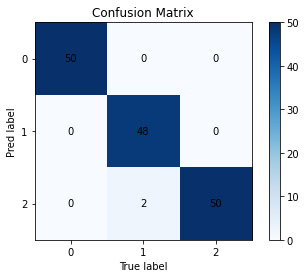

In [63]:

#cm = confusion_matrix(yp1>=0.5, y)
#plot_cm(cm)

y_label = np.argmax(yp, axis=1)
cm = confusion_matrix(y_label, y)
plot_cm(cm) 
#cm = confusion_matrix(yp>=0.5, y)


# Computational Challenges: Propagation and Backpropagation

<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/ANN_ComputationalChallenges.jpg",  width="1000">
</div>